In [1]:
import pandas as pd
import pyreadstat
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
chn=pd.read_csv('trainChina.csv')
chn

,Unnamed: 0,CNTRYID,CNT,CNTSCHID,CNTSTUID,CYC,NatCen,STRATUM,SUBNATIO,OECD,...,PV4RTML,PV5RTML,PV6RTML,PV7RTML,PV8RTML,PV9RTML,PV10RTML,SENWT,VER_DAT,test
0,497898,975.0,QCI,97500001.0,97500332.0,07MS,15600,QCI9797,9750000,0.0,...,623.459,623.016,590.634,635.240,619.120,643.204,594.077,0.12912,26APR19:08:23:38,NaN
1,497899,975.0,QCI,97500001.0,97500558.0,07MS,15600,QCI9797,9750000,0.0,...,469.024,419.151,426.704,469.086,391.922,449.639,446.498,0.12912,26APR19:08:23:38,NaN
2,497900,975.0,QCI,97500001.0,97500596.0,07MS,15600,QCI9797,9750000,0.0,...,559.252,547.685,523.157,537.631,579.320,507.895,574.251,0.12912,26APR19:08:23:38,NaN
3,497901,975.0,QCI,97500001.0,97500611.0,07MS,15600,QCI9797,9750000,0.0,...,474.513,504.596,482.800,480.638,519.164,551.683,549.018,0.12912,26APR19:08:23:38,NaN
4,497902,975.0,QCI,97500001.0,97500841.0,07MS,15600,QCI9797,9750000,0.0,...,640.816,653.454,665.603,659.923,584.311,651.773,633.357,0.12912,26APR19:08:23:38,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12053,509951,975.0,QCI,97500362.0,97509928.0,07MS,15600,QCI9797,9750000,0.0,...,479.007,478.839,501.985,486.681,472.710,492.962,483.237,2.95890,26APR19:08:23:38,NaN
12054,509952,975.0,QCI,97500362.0,97511330.0,07MS,15600,QCI9797,9750000,0.0,...,564.128,606.383,560.014,518.159,582.240,530.630,574.457,2.95890,26APR19:08:23:38,NaN
12055,509953,975.0,QCI,97500362.0,97511720.0,07MS,15600,QCI9797,9750000,0.0,...,530.040,489.952,508.648,567.624,514.151,527.354,498.207,2.95890,26APR19:08:23:38,NaN
12056,509954,975.0,QCI,97500362.0,97511812.0,07MS,15600,QCI9797,9750000,0.0,...,476.004,522.174,522.220,449.477,463.275,519.192,536.824,2.95890,26APR19:08:23:38,NaN


In [5]:
escs_name=["HISEI","PARED","HOMEPOS"]
escs=chn[escs_name]
escs

,HISEI,PARED,HOMEPOS
0,51.01,12.0,-0.4275
1,NaN,12.0,1.0316
2,NaN,9.0,-0.4383
3,NaN,15.0,-1.1675
4,36.35,12.0,-0.7276
...,...,...,...
12053,NaN,NaN,NaN
12054,35.34,12.0,-0.3631
12055,35.34,9.0,0.9642
12056,NaN,NaN,NaN


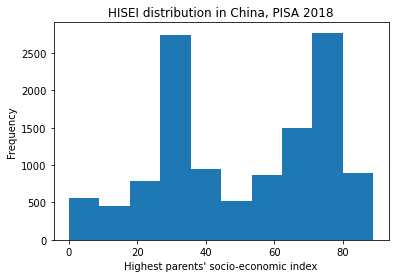

In [23]:
plt.hist(escs['HISEI'])
plt.xlabel("Highest parents' socio-economic index")
plt.ylabel("Frequency")
plt.title("HISEI distribution in China, PISA 2018")
plt.savefig('HISEI chn.jpg')
plt.show()

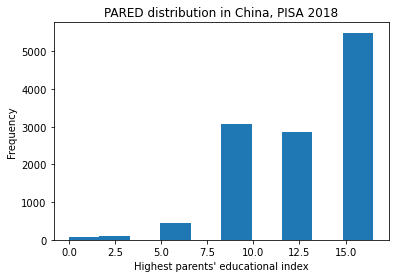

In [24]:
plt.hist(escs['PARED'])
plt.xlabel("Highest parents' educational index")
plt.ylabel("Frequency")
plt.title("PARED distribution in China, PISA 2018")
plt.savefig('par chn.jpg')
plt.show()

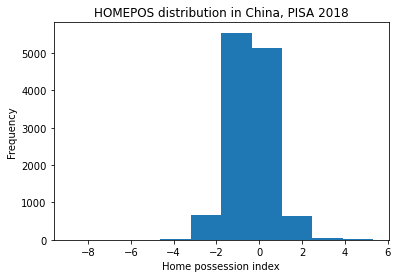

In [25]:
plt.hist(escs['HOMEPOS'])
plt.xlabel("Home possession index")
plt.ylabel("Frequency")
plt.title("HOMEPOS distribution in China, PISA 2018")
plt.savefig('Home chn.jpg')
plt.show()

In [9]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import confusion_matrix

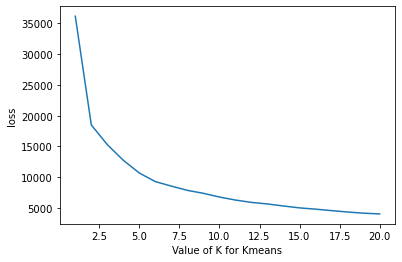

In [10]:
escs=escs.fillna(0)
X = escs.values.tolist()
X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=3)
summary_3d = pca.fit_transform(X_scaled)

#figure with normalization
k_range = range(1, 21)
loss = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X_scaled) 
    loss.append(kmeans.inertia_)
    
plt.plot(k_range, loss)    
plt.xlabel('Value of K for Kmeans')
plt.ylabel('loss')
plt.show()

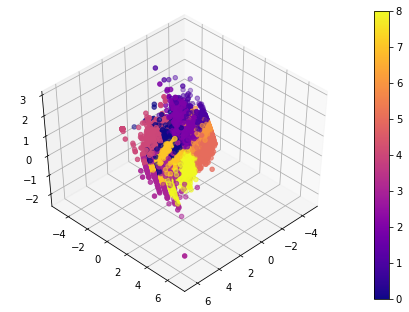

In [11]:
from matplotlib import colors
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns


kmeans = KMeans(n_clusters = 9)
kmeans.fit(X_scaled)
clusters = kmeans.labels_

fig = plt.figure()
ax = Axes3D(fig)
g = ax.scatter(summary_3d[:,0], summary_3d[:,1], summary_3d[:,2], c = clusters, cmap = 'plasma')
plt.colorbar(g, ax = ax)
ax.view_init(azim = 45, elev = 45)

In [12]:
escs['cluster'] = clusters

In [14]:
escs['cluster'] = escs['cluster'].replace([3,4,7,8,0,1,2,5,6],[0,1,2,3,4,5,6,7,8])

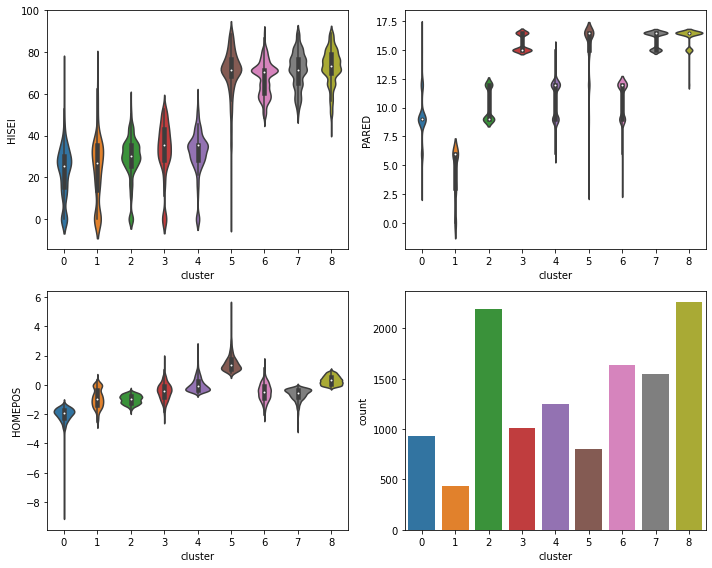

In [15]:
fig, axes = plt.subplots(2,2, figsize = (10,8))

sns.violinplot(data = escs, x = 'cluster', y = 'HISEI', ax = axes[0][0])
sns.violinplot(data = escs, x = 'cluster', y = 'PARED', ax = axes[0][1])
sns.violinplot(data = escs, x = 'cluster', y = 'HOMEPOS', ax = axes[1][0])
sns.countplot(data = escs, x = 'cluster', ax = axes[1][1])

plt.tight_layout()

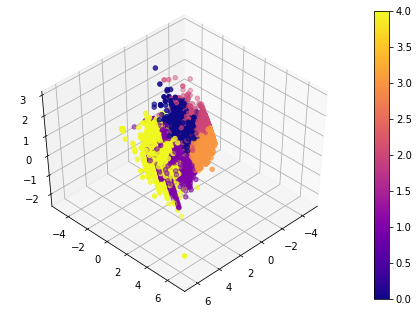

In [16]:
kmeans = KMeans(n_clusters = 5)
kmeans.fit(X_scaled)
clusters = kmeans.labels_

fig = plt.figure()
ax = Axes3D(fig)
g = ax.scatter(summary_3d[:,0], summary_3d[:,1], summary_3d[:,2], c = clusters, cmap = 'plasma')
plt.colorbar(g, ax = ax)
ax.view_init(azim = 45, elev = 45)

In [17]:
escs['cluster'] = clusters

In [19]:
escs['cluster'] = escs['cluster'].replace([4,1,0,2,3],[0,1,2,3,4])

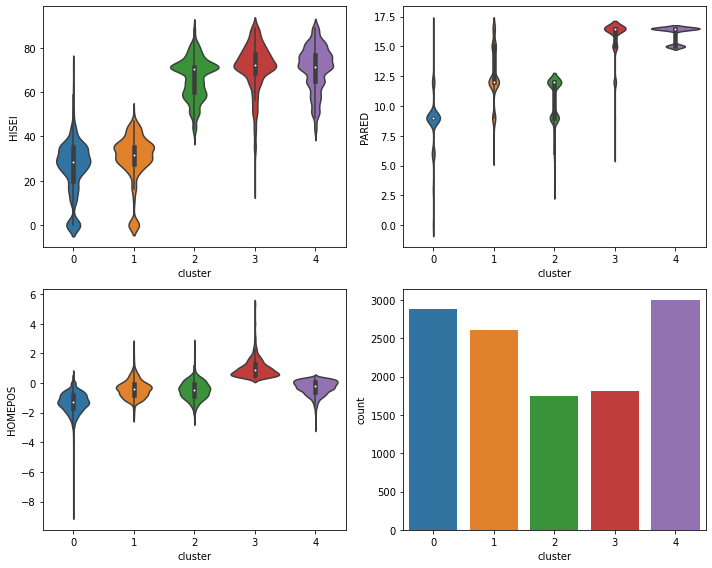

In [20]:
fig, axes = plt.subplots(2,2, figsize = (10,8))

sns.violinplot(data = escs, x = 'cluster', y = 'HISEI', ax = axes[0][0])
sns.violinplot(data = escs, x = 'cluster', y = 'PARED', ax = axes[0][1])
sns.violinplot(data = escs, x = 'cluster', y = 'HOMEPOS', ax = axes[1][0])
sns.countplot(data = escs, x = 'cluster', ax = axes[1][1])

plt.tight_layout()